### **Q1. What is Edge Detection?**
Edge detection is a technique used in image processing and computer vision to identify points in a digital image where brightness changes sharply. These points typically correspond to the boundaries of objects within an image.
In simple terms, edge detection highlights the contours and outlines within an image — it tells us where things are changing.
Technically, edges are detected by identifying discontinuities in pixel intensity, often using derivatives of the image.

### **Q2. Why Do We Use Edge Detection?**
    We use edge detection to:

    1. Identify object boundaries: Helps in recognizing shapes and segmenting different objects in an image.
    2. Reduce data size: By focusing only on edges, we can simplify the image while preserving its structure.
    3. Aid higher-level tasks: Edge maps are often the first step for tasks like object detection, image segmentation, face recognition, and scene understanding.
    4. Improve feature extraction: Good edge detection enhances the quality of features used in machine learning models.

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 839.5, 1039.5, -0.5)

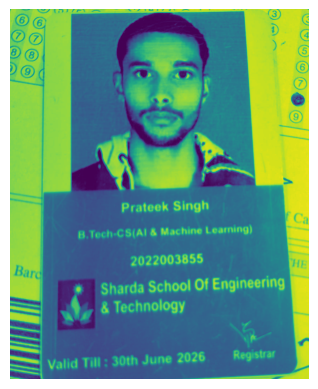

In [3]:
image_path = '/kaggle/input/test-img/Testing_img.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.axis('off')

### **1. Sobal Filter**

In [6]:
# Sobel Kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

In [7]:
# Padding function (replicate edges)
def pad_image(img, pad_width=1):
    return np.pad(img, pad_width=pad_width, mode='edge')

# Convolution function
def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    padded = pad_image(image, pad_width=kh//2)
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [9]:
# Apply convolution with Sobel kernels
grad_x = convolve2d(img, sobel_x)
grad_y = convolve2d(img, sobel_y)

In [10]:
# Compute edge magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)


# Normalize to 0–255 for display
magnitude = np.clip(magnitude / magnitude.max() * 255, 0, 255).astype(np.uint8)

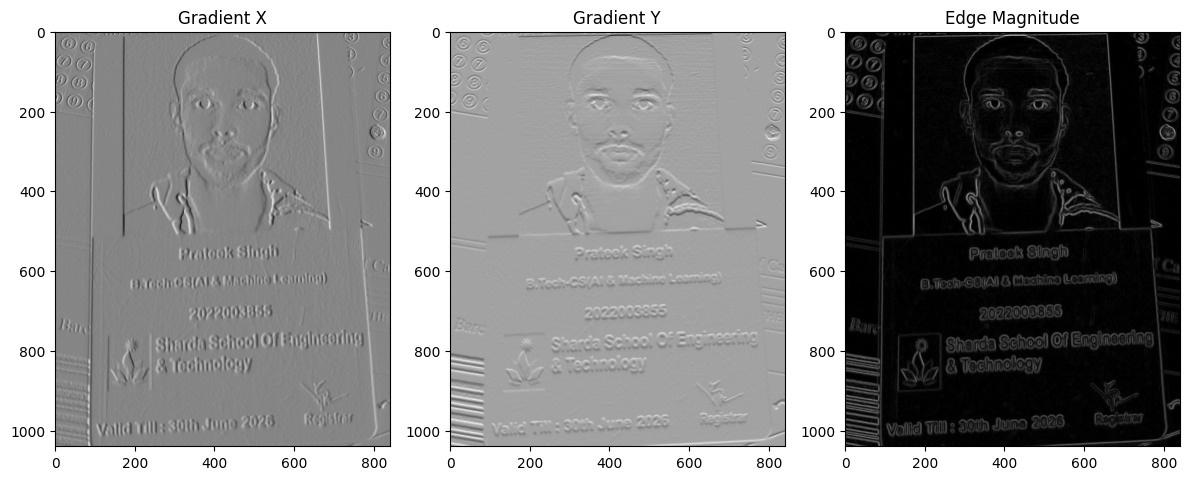

In [11]:
# Plotting the results

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.subplot(1, 3, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Edge Magnitude')
plt.tight_layout()
plt.show()

### **2. Laplacian Edge Detection**

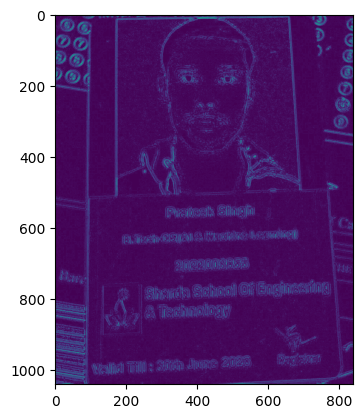

In [20]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian_abs = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian_abs)

### **3. Canny Edge Detection**

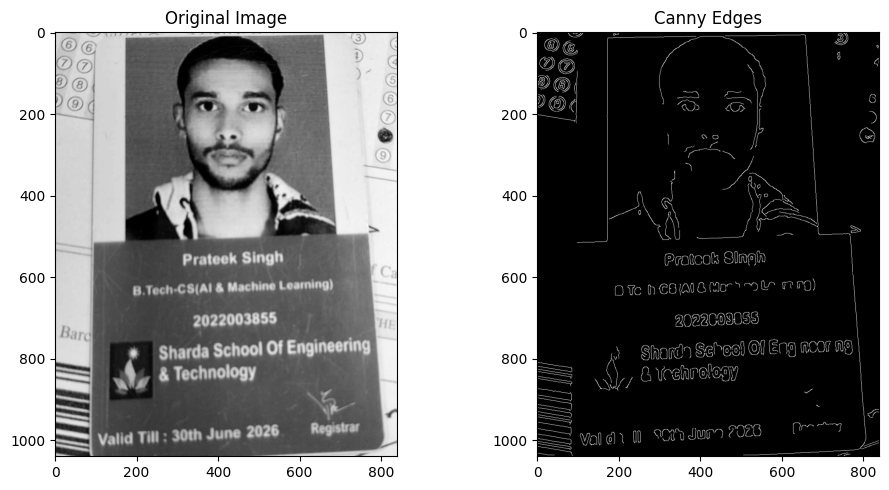

In [ ]:
# Apply Gaussian blur to reduce noise (very important for Canny)
blurred = cv2.GaussianBlur(img, (5, 5), 1.4)

# Apply Canny edge detector
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.tight_layout()
plt.show()
